In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
years = [2021, 2022, 2023, 2024]
data = pd.concat([pd.read_csv(f'data/first_basket_{year}.csv') for year in years]).reset_index(drop = True)

In [13]:
data['first_basket'].value_counts().head(10)

jokicni01    73
embiijo01    71
brownja02    57
porzikr01    56
valanjo01    56
antetgi01    55
adebaba01    54
vucevni01    52
doncilu01    49
mitchdo01    47
Name: first_basket, dtype: int64

In [14]:
(data['Home'] == data['jumpball_possession_tm']).mean()

0.507110851353984

In [15]:
(data['first_basket_tm'] == data['jumpball_possession_tm']).mean()

0.6469900642898889

(array([2424., 1259.,  694.,  360.,  201.,   96.,   33.,   35.,   16.,
           9.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

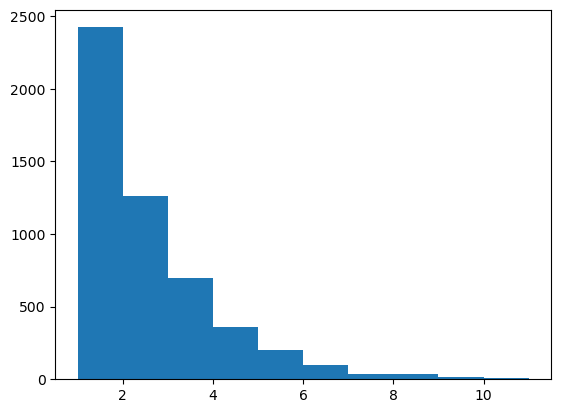

In [16]:
plt.hist(data['num_shots'])

(array([1.689e+03, 1.743e+03, 9.530e+02, 4.400e+02, 1.740e+02, 7.900e+01,
        3.200e+01, 9.000e+00, 7.000e+00, 1.000e+00]),
 array([  3. ,  20.3,  37.6,  54.9,  72.2,  89.5, 106.8, 124.1, 141.4,
        158.7, 176. ]),
 <BarContainer object of 10 artists>)

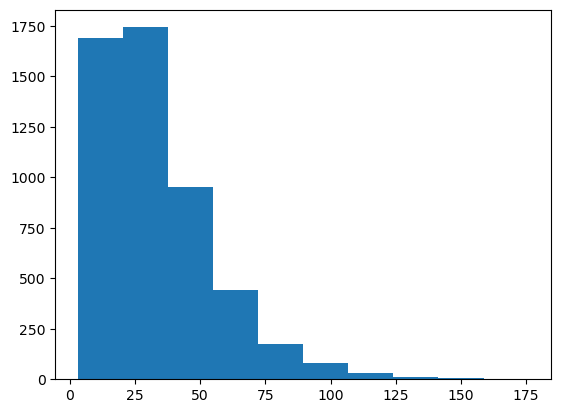

In [18]:
plt.hist(data['time_elapsed'])

In [20]:
data['pts_scored'].value_counts() / data.shape[0]

2.0    0.664524
3.0    0.256965
1.0    0.077343
Name: pts_scored, dtype: float64

In [21]:
#data['jumpball_winner']
data['jumpball_winner'] = (data['jumpball_possession_tm'] == data['Home']) * data['jumpball_home'] + (data['jumpball_possession_tm'] == data['Away']) * data['jumpball_away']

In [22]:
data['jumpball_winner'].value_counts().head(10)

adebaba01    191
aytonde01    190
lopezbr01    189
jokicni01    188
allenja01    180
goberru01    171
nurkiju01    163
embiijo01    159
valanjo01    159
porzikr01    152
Name: jumpball_winner, dtype: int64

In [23]:
data['jumpball_possession_tm'].value_counts().head(10)

PHO    245
CLE    234
MIL    229
BOS    216
MEM    216
LAL    206
MIA    204
PHI    202
DEN    201
NOP    177
Name: jumpball_possession_tm, dtype: int64

In [ ]:
# Load data
years = [2019, 2020, 2021, 2022, 2023, 2024]
cols = ['game_id', 'Date', 'season', 'Home', 'Away', 'jumpball_home', 'jumpball_away', 'jumpball_possession_tm']


first_basket = pd.concat([pd.read_csv(f'../data/first_basket_{year}.csv') for year in years])

In [4]:
stats = pd.concat([pd.read_csv(f'../data/rosters.nosync/rosters_{year}.csv') for year in years]).reset_index(drop = True)

In [5]:
features = []
for f in ['PTS', 'USG%', 'VORP', 'FGA'] :

    stats[f'{f}_avg'] = stats.groupby('player_id')[f'{f}'].expanding().mean().reset_index(level = 0, drop = True)
    stats[f'{f}_avg'] = stats.groupby('player_id')[f'{f}_avg'].shift()
    features.append(f'{f}_avg')

    stats[f'{f}_25'] = stats.groupby('player_id')[f'{f}'].rolling(25, min_periods = 1).mean().reset_index(level = 0, drop = True)
    stats[f'{f}_25'] = stats.groupby('player_id')[f'{f}_25'].shift()
    features.append(f'{f}_25')

stats = stats.merge(first_basket[['game_id', 'first_basket']],
          on = 'game_id',
          how = 'left')

stats['first_basket_scorer'] = (stats['player_id'] == stats['first_basket']).astype(int)

stats = stats[stats['starter']]

In [6]:
stats

,game_id,Player,player_id,Team,MP,FG,FGA,FG%,3P,3PA,...,PTS_avg,PTS_25,USG%_avg,USG%_25,VORP_avg,VORP_25,FGA_avg,FGA_25,first_basket,first_basket_scorer
0,201810160BOS,Jaylen Brown,brownja02,BOS,28.383333,5,13,0.385,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,embiijo01,0
1,201810160BOS,Kyrie Irving,irvinky01,BOS,29.000000,2,14,0.143,1,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,embiijo01,0
2,201810160BOS,Jayson Tatum,tatumja01,BOS,28.933333,9,17,0.529,1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,embiijo01,0
3,201810160BOS,Gordon Hayward,haywago01,BOS,24.616667,4,12,0.333,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,embiijo01,0
10,201810160BOS,Al Horford,horfoal01,BOS,29.950000,4,7,0.571,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,embiijo01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149869,202404140SAS,Jaden Ivey,iveyja01,DET,27.066667,5,13,0.385,1,6,...,15.840000,15.80,25.172667,26.204,-0.725333,-1.216,12.953333,14.16,wisemja01,0
149870,202404140SAS,Troy Brown Jr.,browntr01,DET,11.166667,0,3,0.000,0,0,...,6.185915,3.92,15.380563,12.188,0.082535,-1.180,5.481690,4.40,wisemja01,0
149877,202404140SAS,Blake Wesley,weslebl01,SAS,30.283333,7,9,0.778,1,1,...,4.484536,4.24,16.603093,14.624,-1.518557,-1.000,4.340206,3.68,wisemja01,0
149879,202404140SAS,Chimezie Metu,metuch01,DET,33.433333,4,9,0.444,1,4,...,5.841699,6.96,19.548649,14.740,0.128185,0.520,4.563707,5.24,wisemja01,0


In [9]:
stats[features] = (
    (
        stats[features] - stats.groupby('game_id')[features].transform('mean')
    )
    / stats.groupby('game_id')[features].transform('std')
)

In [10]:
stats.groupby('first_basket_scorer').get_group(1)['PTS_avg'].mean(), stats.groupby('first_basket_scorer').get_group(0)['PTS_avg'].mean()

(np.float64(0.19132378910505624), np.float64(-0.021230016905728108))

In [11]:
stats.groupby('first_basket_scorer').get_group(1)['USG%_avg'].mean(), stats.groupby('first_basket_scorer').get_group(0)['USG%_avg'].mean()

(np.float64(0.183547376488622), np.float64(-0.02036711652054829))

In [14]:
stats.groupby('first_basket_scorer').get_group(1)['VORP_avg'].mean(), stats.groupby('first_basket_scorer').get_group(0)['VORP_avg'].mean()

(np.float64(0.17761466905799497), np.float64(-0.019708800690414956))

In [13]:
stats.groupby('first_basket_scorer').get_group(1)['FGA_avg'].mean(), stats.groupby('first_basket_scorer').get_group(0)['FGA_avg'].mean()

(np.float64(0.1659407639871211), np.float64(-0.018413419686464476))

In [15]:
import seaborn as sns

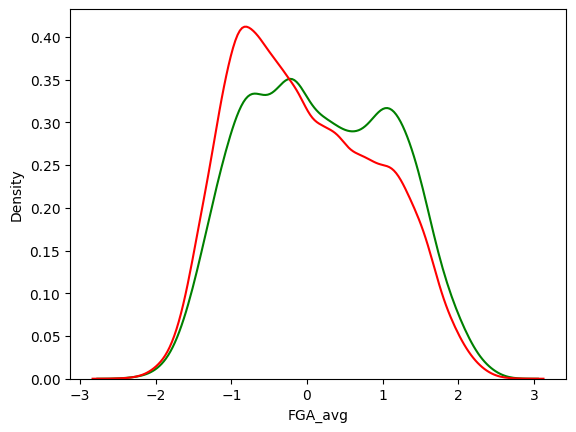

In [17]:
plt.figure()
sns.kdeplot(stats.groupby('first_basket_scorer').get_group(1)['FGA_avg'], color = 'green')
sns.kdeplot(stats.groupby('first_basket_scorer').get_group(0)['FGA_avg'], color = 'red')
plt.show()

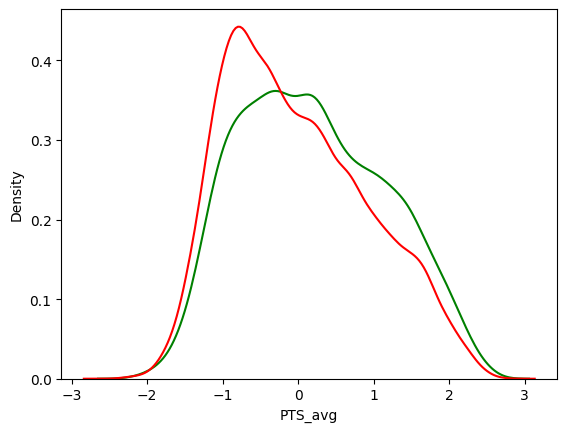

In [18]:
plt.figure()
sns.kdeplot(stats.groupby('first_basket_scorer').get_group(1)['PTS_avg'], color = 'green')
sns.kdeplot(stats.groupby('first_basket_scorer').get_group(0)['PTS_avg'], color = 'red')
plt.show()

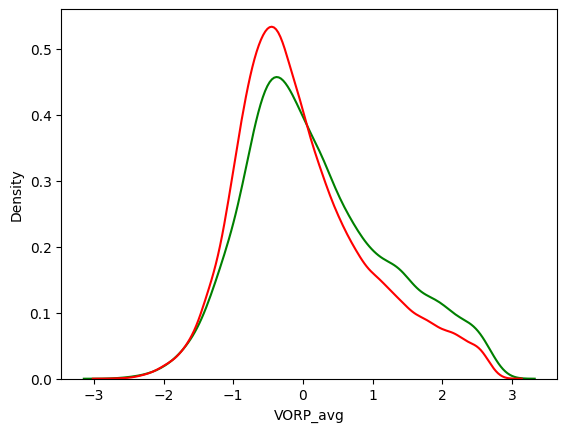

In [19]:
plt.figure()
sns.kdeplot(stats.groupby('first_basket_scorer').get_group(1)['VORP_avg'], color = 'green')
sns.kdeplot(stats.groupby('first_basket_scorer').get_group(0)['VORP_avg'], color = 'red')
plt.show()

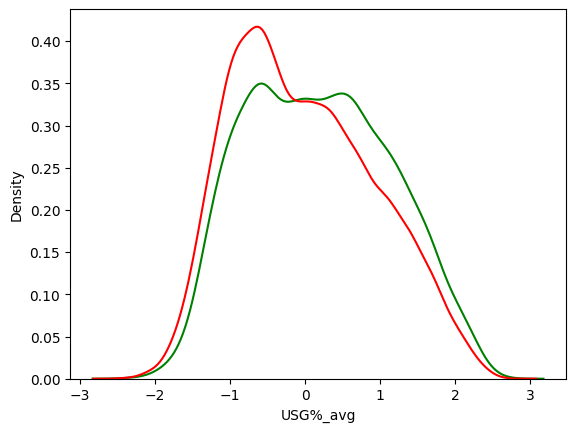

In [20]:
plt.figure()
sns.kdeplot(stats.groupby('first_basket_scorer').get_group(1)['USG%_avg'], color = 'green')
sns.kdeplot(stats.groupby('first_basket_scorer').get_group(0)['USG%_avg'], color = 'red')
plt.show()